In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import gc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_trans = pd.read_csv("/content/drive/MyDrive/프로젝트/train_transaction.csv")
train_idf = pd.read_csv("/content/drive/MyDrive/프로젝트/train_identity.csv")
test_trans = pd.read_csv("/content/drive/MyDrive/프로젝트/test_transaction.csv")
test_idf = pd.read_csv("/content/drive/MyDrive/프로젝트/test_identity.csv")

In [3]:
train_idf.columns = [col.replace('-', '_') if 'id' in col else col for col in train_idf.columns]
test_idf.columns = [col.replace('-', '_') if 'id' in col else col for col in test_idf.columns]

In [4]:
filtered_cols = [
    'TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
    'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
    'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
    'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
    'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
    'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17', 'V20', 'V23', 'V26', 'V27', 'V30',
    'V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V54', 'V56', 'V59', 'V62', 'V65', 'V67', 'V68', 'V70',
    'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91', 'V96', 'V98', 'V99', 'V104', 'V107', 'V108',
    'V111', 'V115', 'V117', 'V120', 'V121', 'V123', 'V124', 'V127', 'V129', 'V130', 'V136', 'V138', 'V139',
    'V142', 'V147', 'V156', 'V162', 'V165', 'V160', 'V166', 'V178', 'V176', 'V173', 'V182', 'V187', 'V203',
    'V205', 'V207', 'V215', 'V169', 'V171', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209', 'V218',
    'V223', 'V224', 'V226', 'V228', 'V229', 'V235', 'V240', 'V258', 'V257', 'V253', 'V252', 'V260', 'V261',
    'V264', 'V266', 'V267', 'V274', 'V277', 'V220', 'V221', 'V234', 'V238', 'V250', 'V271', 'V294', 'V284',
    'V285', 'V286', 'V291', 'V297', 'V303', 'V305', 'V307', 'V309', 'V310', 'V320', 'V281', 'V283', 'V289',
    'V296', 'V301', 'V314', 'V332', 'V325', 'V335', 'V338'
]
train_trans = train_trans[filtered_cols]
filtered_cols2 = [
    'TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
    'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
    'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
    'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
    'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
    'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17', 'V20', 'V23', 'V26', 'V27', 'V30',
    'V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V54', 'V56', 'V59', 'V62', 'V65', 'V67', 'V68', 'V70',
    'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91', 'V96', 'V98', 'V99', 'V104', 'V107', 'V108',
    'V111', 'V115', 'V117', 'V120', 'V121', 'V123', 'V124', 'V127', 'V129', 'V130', 'V136', 'V138', 'V139',
    'V142', 'V147', 'V156', 'V162', 'V165', 'V160', 'V166', 'V178', 'V176', 'V173', 'V182', 'V187', 'V203',
    'V205', 'V207', 'V215', 'V169', 'V171', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209', 'V218',
    'V223', 'V224', 'V226', 'V228', 'V229', 'V235', 'V240', 'V258', 'V257', 'V253', 'V252', 'V260', 'V261',
    'V264', 'V266', 'V267', 'V274', 'V277', 'V220', 'V221', 'V234', 'V238', 'V250', 'V271', 'V294', 'V284',
    'V285', 'V286', 'V291', 'V297', 'V303', 'V305', 'V307', 'V309', 'V310', 'V320', 'V281', 'V283', 'V289',
    'V296', 'V301', 'V314', 'V332', 'V325', 'V335', 'V338'
]
test_trans = test_trans[filtered_cols2]

In [5]:
train_trans['TransactionDay'] = train_trans['TransactionDT'] // (24 * 60 * 60)
test_trans['TransactionDay'] = test_trans['TransactionDT'] // (24 * 60 * 60)

In [6]:
for col in train_trans.columns:
    for i in range(1, 16):
      if i != 9:
        train_trans[f'D{i}n'] = train_trans['TransactionDay'] - train_trans[f'D{i}']
        test_trans[f'D{i}n'] = test_trans['TransactionDay'] - test_trans[f'D{i}']

In [7]:
train_trans['uid'] = train_trans.card1.astype(str) + '_' + train_trans.addr1.astype(str) + '_' + train_trans.D1n.astype(str) + train_trans.P_emaildomain.astype(str) + train_trans.R_emaildomain.astype(str)
test_trans['uid'] = test_trans.card1.astype(str) + '_' + test_trans.addr1.astype(str) + '_' + test_trans.D1n.astype(str) + test_trans.P_emaildomain.astype(str) + test_trans.R_emaildomain.astype(str)

In [8]:
# train_trans['uid'] = train_trans.card1.astype(str)
# test_trans['uid'] =

In [9]:
M_feature = [ c for c in train_trans.columns if c.find('M') !=-1]

In [10]:
import datetime

START_DATE = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')
train_trans['TransactionDT'] = pd.to_datetime(train_trans['TransactionDT'], unit='s', origin=START_DATE)
test_trans['TransactionDT'] = pd.to_datetime(test_trans['TransactionDT'], unit='s', origin=START_DATE)

client_activity = train_trans.groupby('uid')['TransactionDT'].agg(['min', 'max'])
client_activity['duration'] = (client_activity['max'] - client_activity['min']).dt.days

# 활동 기간 피처 추가
train_trans = train_trans.merge(client_activity['duration'], on='uid', how='left')
test_trans = test_trans.merge(client_activity['duration'], on='uid', how='left')
train_trans.rename(columns={'duration': 'client_activity_duration'}, inplace=True)
test_trans.rename(columns={'duration': 'client_activity_duration'}, inplace=True)

In [11]:
def encode_AG(main_columns, uids, aggregations=['mean'], train_df = train_trans, test_df = test_trans,
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:
        for col in uids:
            for agg_type in aggregations:
                new_col_name = main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')

                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)

                print("'"+new_col_name+"'",', ',end='')

def encode_AG2(main_columns, uids, train_df=train_trans, test_df=test_trans):
    for main_column in main_columns:
        for col in uids:
            comb = pd.concat([train_df[[col, main_column]],test_df[[col, main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

def encode_FE(df1, df2, cols):
    for col in cols:
        df = pd.concat([df1[col],df2[col]])
        vc = df.value_counts(dropna=True, normalize=True).to_dict()
        vc[-1] = -1
        nm = col+'_FE'
        df1[nm] = df1[col].map(vc)
        df1[nm] = df1[nm].astype('float32')
        df2[nm] = df2[col].map(vc)
        df2[nm] = df2[nm].astype('float32')
        print(nm,', ',end='')

def encode_CB(col1,col2,df1=train_trans,df2=test_trans):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str)
    print(nm,', ',end='')

def encode_LE(columns, train_df, test_df, verbose=True):
    for col in columns:
        df_comb = pd.concat([train_df[col], test_df[col]], axis=0)
        df_comb, _ = df_comb.factorize(sort=True)
        nm = col
        if df_comb.max() > 32000:
            train_df[nm] = df_comb[:len(train_df)].astype('int32')
            test_df[nm] = df_comb[len(train_df):].astype('int32')
        else:
            train_df[nm] = df_comb[:len(train_df)].astype('int16')
            test_df[nm] = df_comb[len(train_df):].astype('int16')
        del df_comb
        gc.collect()
        if verbose:
            print(nm, ', ', end='')

In [12]:
encode_AG(['TransactionAmt', 'D4n', 'D5n', 'D10n', 'D11n', 'D15n'], ['uid'], aggregations=['mean', 'std'])
encode_AG(['C1', 'C2', 'C6', 'C9', 'C11', 'C13'], ['uid'], aggregations=['mean', 'std'])
encode_AG2(['TransactionAmt', 'D4n', 'D5n', 'D10n', 'D11n', 'D15n'], ['uid'])
encode_AG2(['C1', 'C2', 'C6', 'C9', 'C11', 'C13'], ['uid'])

'TransactionAmt_uid_mean' , 'TransactionAmt_uid_std' , 'D4n_uid_mean' , 'D4n_uid_std' , 'D5n_uid_mean' , 'D5n_uid_std' , 'D10n_uid_mean' , 'D10n_uid_std' , 'D11n_uid_mean' , 'D11n_uid_std' , 'D15n_uid_mean' , 'D15n_uid_std' , 'C1_uid_mean' , 'C1_uid_std' , 'C2_uid_mean' , 'C2_uid_std' , 'C6_uid_mean' , 'C6_uid_std' , 'C9_uid_mean' , 'C9_uid_std' , 'C11_uid_mean' , 'C11_uid_std' , 'C13_uid_mean' , 'C13_uid_std' , uid_TransactionAmt_ct, uid_D4n_ct, uid_D5n_ct, uid_D10n_ct, uid_D11n_ct, uid_D15n_ct, uid_C1_ct, uid_C2_ct, uid_C6_ct, uid_C9_ct, uid_C11_ct, uid_C13_ct, 

In [13]:
mapping = {'T': 1, 'F': 0, 'M0': 0, 'M1': 1, 'M2': 2}
for col in M_feature:
    train_trans[col] = train_trans[col].map(mapping)
    test_trans[col] = test_trans[col].map(mapping)

### 학습에 사용할 데이터 프레임 생성

In [14]:
drop_cols = ['TransactionID', 'P_emaildomain', 'R_emaildomain', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'TransactionDT', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'addr1', 'addr2', 'dist1', 'dist2']
train_ = train_trans.drop(columns=drop_cols)
test_ = test_trans.drop(columns=drop_cols)

In [15]:
def add_transaction_amt_features(df):
    cols_to_use = ['C13', 'C11', 'C9', 'C2', 'C1']
    for col in cols_to_use:
        df[f'{col}_TransactionAmt_mean'] = df.groupby(col)['TransactionAmt'].transform('mean')
        df[f'{col}_TransactionAmt_std'] = df.groupby(col)['TransactionAmt'].transform('std')
    return df

In [16]:
# 각 D 컬럼별로 'TransactionAmt'의 평균과 총합 계산 함수
def add_transaction_amt_features2(df):
    cols_to_use = ['D4n', 'D5n', 'D10n', 'D11n', 'D15n']
    for col in cols_to_use:
        df[f'{col}_TransactionAmt_mean'] = df.groupby(col)['TransactionAmt'].transform('mean')
        df[f'{col}_TransactionAmt_std'] = df.groupby(col)['TransactionAmt'].transform('std')
    return df

In [17]:
def add_grouped_stats(df):
    cols_to_use = ['C13', 'C11', 'C9', 'C2', 'C1']
    grouped_stats = df.groupby('uid').agg(
        {f'{col}_TransactionAmt_mean': 'mean' for col in cols_to_use} |
        {f'{col}_TransactionAmt_std': 'sum' for col in cols_to_use}
    ).reset_index()
    return grouped_stats

In [18]:
train_ = add_transaction_amt_features2(train_)
test_ = add_transaction_amt_features2(test_)

In [19]:
train_ = add_transaction_amt_features(train_)
test_ = add_transaction_amt_features(test_)

In [20]:
train_grouped_stats = add_grouped_stats(train_)
test_grouped_stats = add_grouped_stats(test_)

In [21]:
train_.drop(columns = ['uid', 'TransactionAmt'], inplace = True)
test_.drop(columns = ['uid', 'TransactionAmt'], inplace = True)

In [22]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['ProductCD']

encode_LE(label_cols, train_, test_)

ProductCD , 

In [23]:
X = train_.drop(columns = ['isFraud'])
y = train_.isFraud

In [24]:
from sklearn.model_selection import train_test_split

# train, valid split
X_tr, X_v, y_tr, y_v = train_test_split(X, y, test_size=0.25,
random_state=2024,
stratify=y)


import lightgbm as lgb

# 데이터 셋 생성
train_data = lgb.Dataset(X_tr, label=y_tr)
valid_data = lgb.Dataset(X_v, label=y_v)

params = {
'objective': 'binary',
'metric': 'auc'
}

# 모델 학습
callbacks = [lgb.early_stopping(stopping_rounds=100),
lgb.log_evaluation(period=100)]
clf = lgb.train(params, train_data,
num_boost_round = 10000,
valid_sets = [train_data, valid_data],
callbacks=callbacks)

# test 제출
preds = clf.predict(test_)
result = pd.read_csv("/content/drive/MyDrive/프로젝트/sample_submission.csv")
result ['isFraud'] = preds
result .to_csv('result.csv', index=False)

[LightGBM] [Info] Number of positive: 15497, number of negative: 427408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27632
[LightGBM] [Info] Number of data points in the train set: 442905, number of used features: 223
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034989 -> initscore=-3.317093
[LightGBM] [Info] Start training from score -3.317093
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.952571	valid_1's auc: 0.939772
[200]	training's auc: 0.968968	valid_1's auc: 0.951732
[300]	training's auc: 0.977969	valid_1's auc: 0.957423
[400]	training's auc: 0.983628	valid_1's auc: 0.9614
[500]	training's auc: 0.987186	valid_1's auc: 0.964188
[600]	training's auc: 0.989791	valid_1's auc: 0.966389
[700]	training's auc: 0.991884	valid_1's auc: 0.

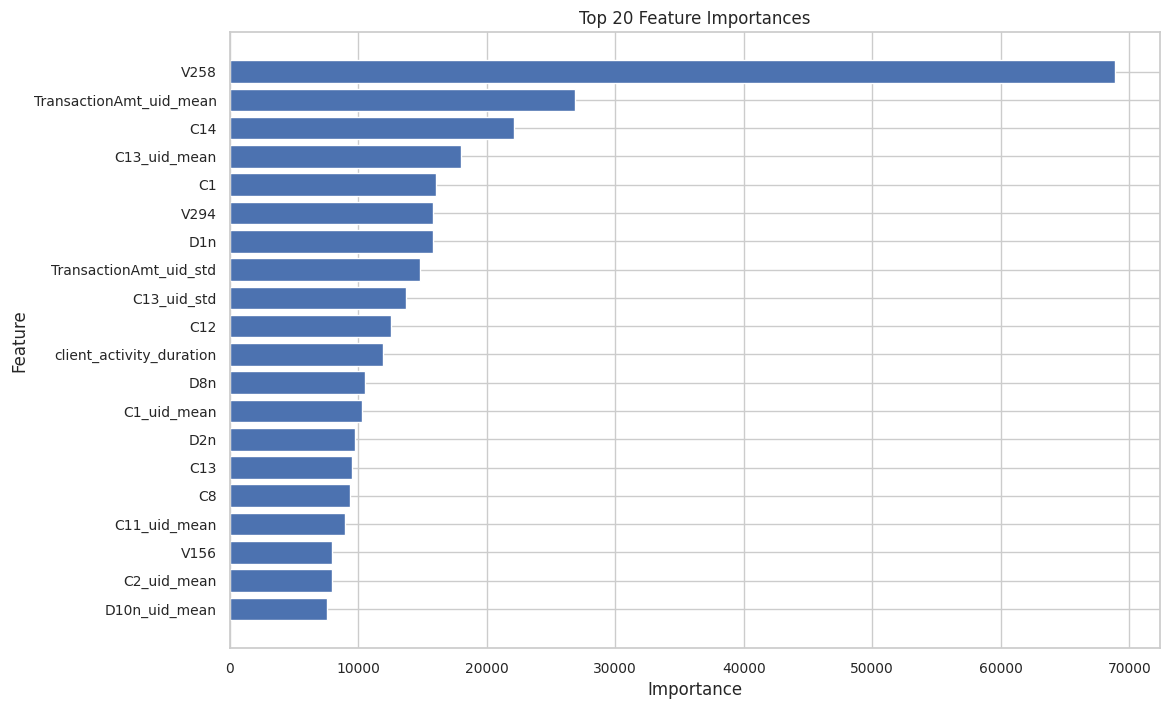

In [25]:
# 중요도 추출
feature_importances = clf.feature_importance(importance_type='gain')  # 'split' or 'gain'
feature_names = clf.feature_name()

# 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# 상위 N개의 특성 선택
top_n = 20
top_features = importance_df.head(top_n)

# 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# 중요도가 낮은 피처 제거
# 여기서 10을 임계값으로 설정합니다. 임계값은 원하는대로 조정 가능합니다.
threshold = 10
low_importance_features = importance_df[importance_df['importance'] < threshold]['feature'].tolist()

# 중요도가 낮은 피처 제거
X = X.drop(columns=low_importance_features)
test_ = test_.drop(columns=low_importance_features)

# 새로운 데이터셋으로 모델 학습 및 평가
X_tr, X_v, y_tr, y_v = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)
train_data = lgb.Dataset(X_tr, label=y_tr)
valid_data = lgb.Dataset(X_v, label=y_v)

clf = lgb.train(params, train_data, num_boost_round=10000, valid_sets=[train_data, valid_data], callbacks=callbacks)

[LightGBM] [Info] Number of positive: 15497, number of negative: 427408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.127740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27592
[LightGBM] [Info] Number of data points in the train set: 442905, number of used features: 212
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034989 -> initscore=-3.317093
[LightGBM] [Info] Start training from score -3.317093
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.952571	valid_1's auc: 0.939772
[200]	training's auc: 0.968968	valid_1's auc: 0.951732
[300]	training's auc: 0.977969	valid_1's auc: 0.957423
[400]	training's auc: 0.983628	valid_1's auc: 0.9614
[500]	training's auc: 0.987186	valid_1's auc: 0.964188
[600]	training's auc: 0.989791	valid_1's auc: 0.966389
[700]	training's auc: 0.991884	valid_1's auc: 0.

In [ ]:
# test 제출
preds = clf.predict(test_)
result = pd.read_csv("/content/drive/MyDrive/프로젝트/sample_submission.csv")
result ['isFraud'] = preds
result .to_csv('result.csv', index=False)